# Task 3: Exploratory Data Analysis on dataset 'SampleSuperstore'
## EDA (Exploratory Data Analysis)
## Objective
- Perform "Exploratory Data Analysis" on the dataset "SampleSuperstore".
- As a business manager, try to find out the weak areas where you can work to make more profit.
- What all business problems you can derive by exploring the data?



# Data Science Business Analytics Internship
# GRIP @ The Sparks Foundaton
# BY: Vivek Kumar Patel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read Data Set...

In [2]:
data = pd.read_csv("C:/Users/Vivek Kumar Singh/Downloads/SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Data Shape

In [4]:
print("Data Shape i.e, Row & Columns :",data.shape)

Data Shape i.e, Row & Columns : (9994, 13)


## Data Columns Name

In [5]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## Find Objective Variable & Unique Value in Data Set

In [6]:
column_name = []
unique_value = []

for col in data:
    if data[col].dtype == object:
        column_name.append(str(col))
        unique_value.append(data[col].nunique())
        
table = pd.DataFrame()
table["Col_Name"] = column_name
table["Value"] = unique_value
table = table.sort_values('Value',ascending=False)
table

,Col_Name,Value
3,City,531
4,State,49
7,Sub-Category,17
0,Ship Mode,4
5,Region,4
1,Segment,3
6,Category,3
2,Country,1


## Find Float Variable & Unique Value in Data Set

In [7]:
column_name = []
unique_value = []

for col in data:
    if data[col].dtype == float:
        column_name.append(str(col))
        unique_value.append(data[col].nunique())
        
table = pd.DataFrame()
table["Col_Name"] = column_name
table["Value"] = unique_value
table = table.sort_values('Value',ascending=False)
table

,Col_Name,Value
2,Profit,7287
0,Sales,5825
1,Discount,12


## Find Missing value & percentage of Missing Value

In [8]:
def missing_value(df):
    total_missing = df.isnull().sum().sort_values(ascending=False)
    percentage_missing = (100*df.isnull().sum()/len(df)).sort_values(ascending=False)
    missing_table = pd.DataFrame({"missing value":total_missing,"% missing":percentage_missing})
    return missing_table

missing_value(data)

,missing value,% missing
Profit,0,0.0
Discount,0,0.0
Quantity,0,0.0
Sales,0,0.0
Sub-Category,0,0.0
Category,0,0.0
Region,0,0.0
Postal Code,0,0.0
State,0,0.0
City,0,0.0


- No Missing value in Data Set

## Find Duplicate Row in Data Set

In [9]:
duplicate = data[data.duplicated()] 
  
print("Duplicate Rows :") 
  
# Print the resultant Dataframe 
duplicate 

Duplicate Rows :


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [10]:
# Find Duplicate Row in Data Set
duplicate_rows=data.duplicated().sum()
print("Total Number Of Duplicated Rows :" ,duplicate_rows)

Total Number Of Duplicated Rows : 17


In [11]:
data=data.drop_duplicates()
# Find Duplicate Row in Data Set
data1=data.duplicated().sum()
print("Total Number Of Duplicated Rows :" ,data1)

Total Number Of Duplicated Rows : 0


In [12]:
# Find Duplicate Row in Data Set
duplicate_rows=data.duplicated().sum()
print("Total Number Of Duplicated Rows :" ,duplicate_rows)

Total Number Of Duplicated Rows : 0


In [13]:
data.shape

(9977, 13)

# Univariant Analysis

## State 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

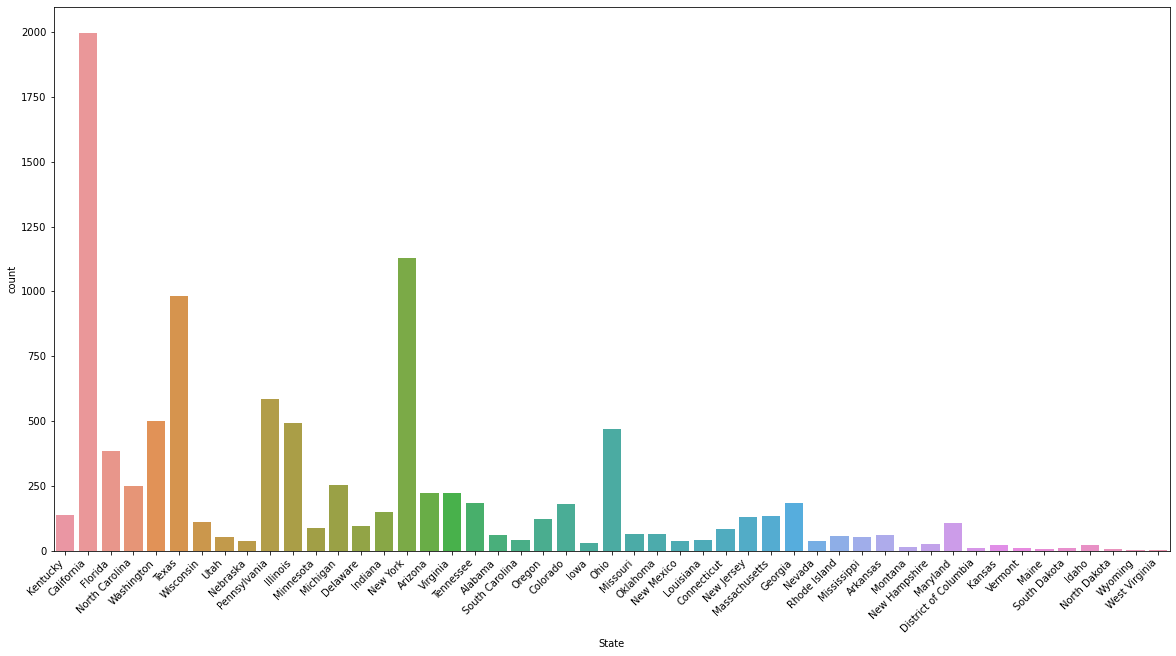

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(data['State'])
plt.xticks(rotation=45,ha='right')

## Ship Mode

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

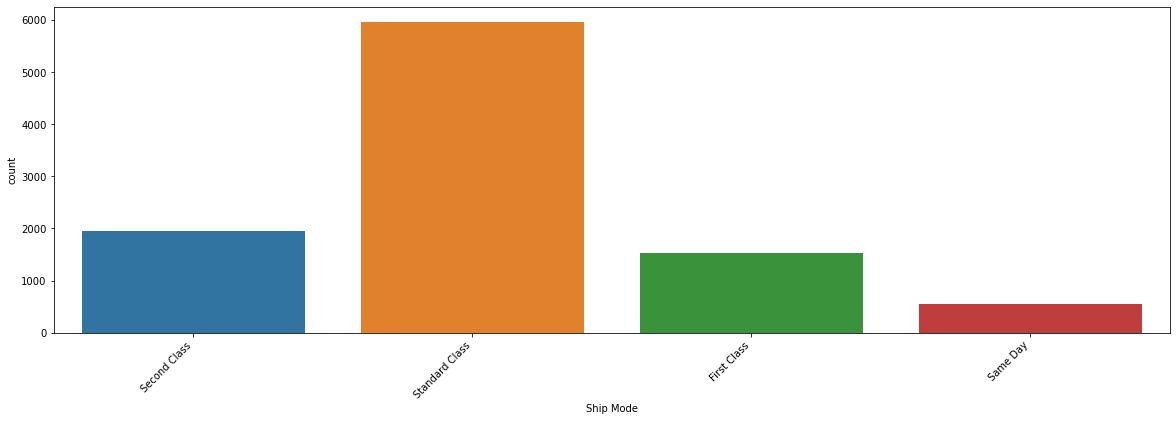

In [15]:
plt.figure(figsize=(20,6))
sns.countplot(data['Ship Mode'])
plt.xticks(rotation=45,ha='right')

## Region

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

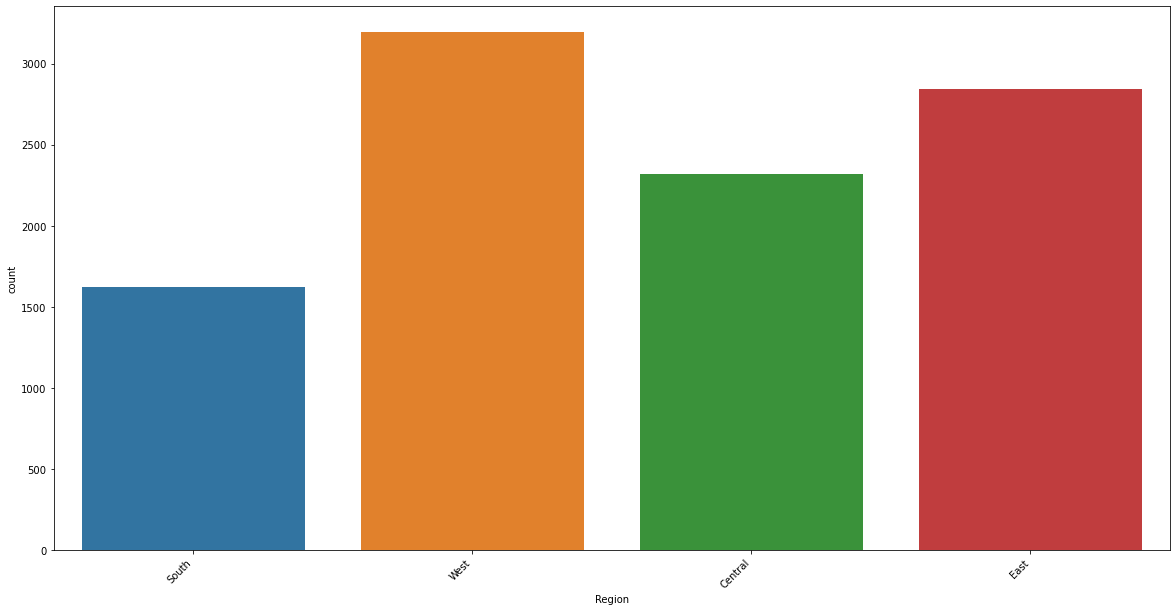

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(data['Region'])
plt.xticks(rotation=45,ha='right')

## Category

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

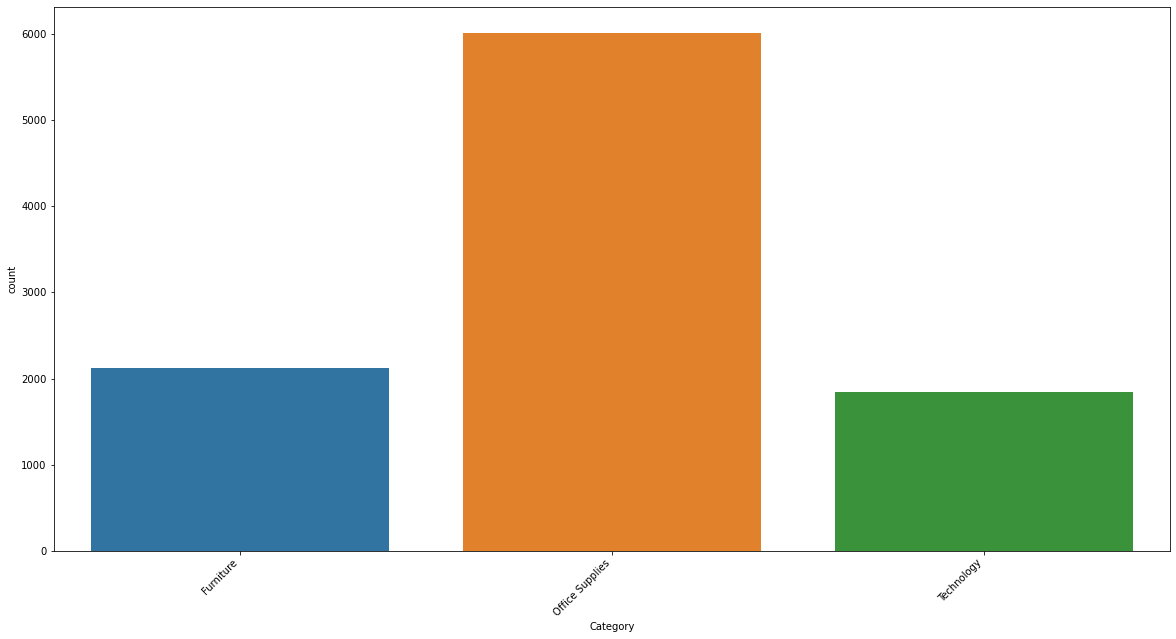

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(data['Category'])
plt.xticks(rotation=45,ha='right')

## Sub-Category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

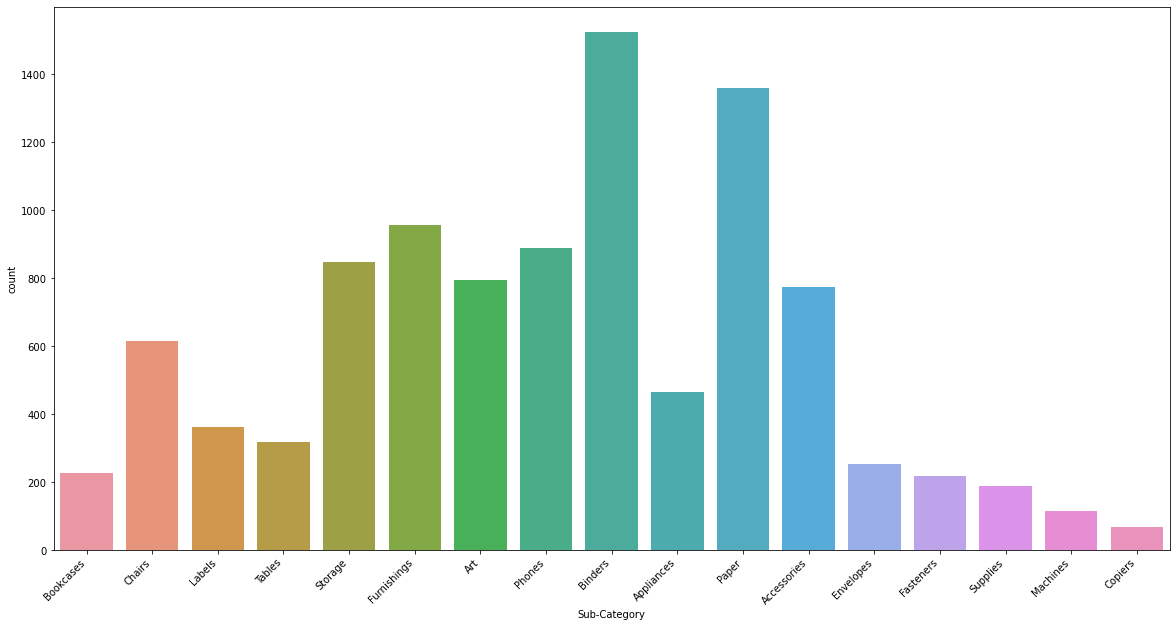

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(data['Sub-Category'])
plt.xticks(rotation=45,ha='right')

# Bivariant Analysis

## Find Total Sale, Profit Discount & Quality in Category vise

In [19]:
Category=data.groupby(["Category"])[["Quantity","Sales","Profit","Discount"]].sum()
Category

,Quantity,Sales,Profit,Discount
Category,,,,
Furniture,8020,741306.3133,18421.8137,368.59
Office Supplies,22861,718735.2440,122364.6608,946.20
Technology,6939,836154.0330,145454.9481,244.40


<Figure size 864x576 with 0 Axes>

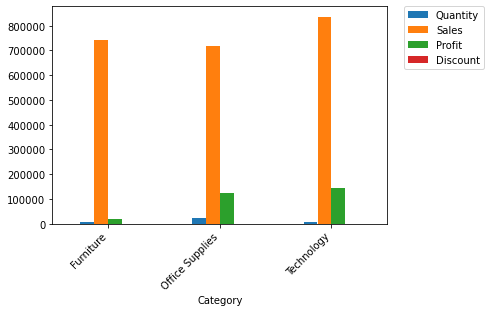

In [20]:
plt.figure(figsize=(12,8))
Category.plot.bar()
plt.xticks(rotation=45,ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<ipython-input-21-6d5774924bba>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Category')['Profit','Sales',"Discount"].agg(['sum']).plot.bar()


<Figure size 1440x432 with 0 Axes>

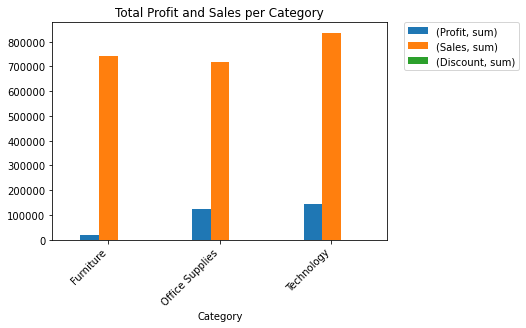

In [21]:
plt.figure(figsize=(20,6))
data.groupby('Category')['Profit','Sales',"Discount"].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Category')
plt.xticks(rotation=45,ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Find Total Sale, Profit Discount & Quality in Sub-Category vise

In [22]:
Sub_Category=data.groupby(["Sub-Category"])[["Quantity","Sales","Profit","Discount"]].sum()
Sub_Category

,Quantity,Sales,Profit,Discount
Sub-Category,,,,
Accessories,2976,167380.3180,41936.6357,60.80
Appliances,1729,107532.1610,18138.0054,77.60
Art,2996,27107.0320,6524.6118,59.60
Binders,5971,203409.1690,30228.0003,566.20
Bookcases,868,114879.9963,-3472.5560,48.14
Chairs,2351,327777.7610,26567.1278,104.70
Copiers,234,149528.0300,55617.8249,11.00
Envelopes,906,16476.4020,6964.1767,20.40
Fasteners,914,3024.2800,949.5182,17.80


<Figure size 720x720 with 0 Axes>

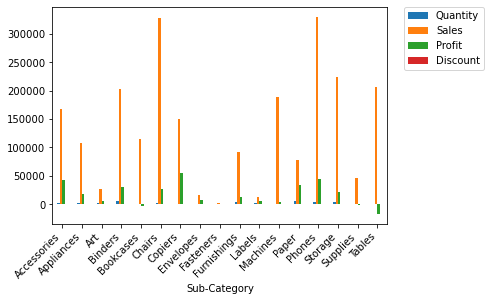

In [23]:
plt.figure(figsize=(10,10))
Sub_Category.plot.bar()
plt.xticks(rotation=45,ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<ipython-input-24-9c0a00e90423>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Sub-Category')['Profit','Sales',"Discount"].agg(['sum']).plot.bar()


<Figure size 1440x432 with 0 Axes>

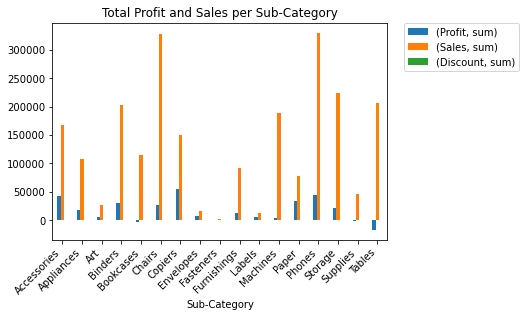

In [24]:
plt.figure(figsize=(20,6))
data.groupby('Sub-Category')['Profit','Sales',"Discount"].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.xticks(rotation=45,ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Find Total Sale, Profit Discount & Quality in Rigion Vise

In [25]:
region=data[["Sales","Profit","Discount","Region"]].groupby(["Region"]).sum()
region

,Sales,Profit,Discount
Region,,,
Central,500782.8528,39655.8752,557.14
East,678435.1960,91506.3092,413.50
South,391721.9050,46749.4303,238.55
West,725255.6365,108329.8079,350.00


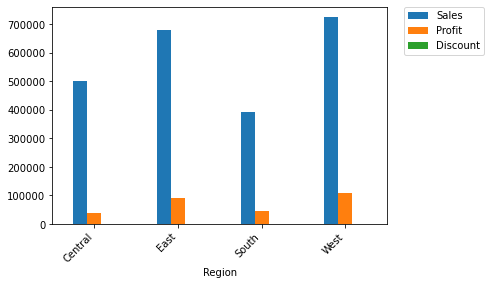

In [27]:
region.plot.bar()
plt.xticks(rotation=45,ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Find Total Sale, Profit Discount & Quality in State vise

In [29]:
state=data.groupby(["State"])[["Sales","Profit","Discount"]].sum()
state

,Sales,Profit,Discount
State,,,
Alabama,19510.6400,5786.8253,0.00
Arizona,35282.0010,-3427.9246,68.00
Arkansas,11678.1300,4008.6871,0.00
California,457576.2715,76330.7891,145.60
Colorado,32108.1180,-6527.8579,57.60
Connecticut,13384.3570,3511.4918,0.60
Delaware,27451.0690,9977.3748,0.60
District of Columbia,2865.0200,1059.5893,0.00
Florida,89473.7080,-3399.3017,114.65


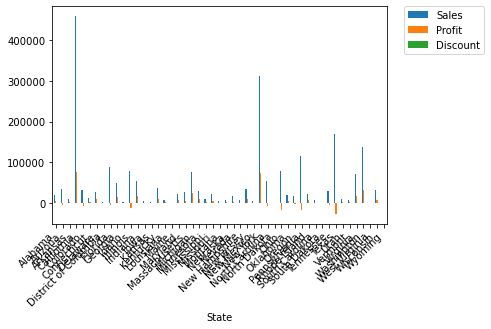

In [30]:
state.plot.bar()
plt.xticks(rotation=45,ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Find Total Sale, Profit Discount & Quality in Ship Mode vise

In [34]:
ship=data[["Sales","Profit","Discount","Ship Mode"]].groupby(["Ship Mode"]).sum()
ship

,Sales,Profit,Discount
Ship Mode,,,
First Class,3.513805e+05,48953.6561,252.97
Same Day,1.283217e+05,15871.8869,82.75
Second Class,4.591770e+05,57446.6516,269.35
Standard Class,1.357316e+06,163969.2280,954.12


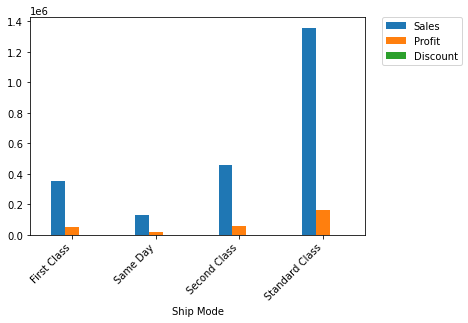

In [35]:
ship.plot.bar()
plt.xticks(rotation=45,ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()